In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Background
'''
In this project I am presenting an effective way to do sentiment analysis. It is often the case that companies need to understand about the sentiments of the users
based on their reviews and ratings. Through this project, I am developing an effective natural language processing model that would perfrom sentiment analysis of 
the readily available dataset. The name of the dataset is "Reviews.csv".
Sentiment analysis is the process of 'computationally' determining whether a piece of writing is positive, negative or neutral. 
Sentiment Analysis is an effective tool to improve the company standards and sales in general. It provides a way to know what customers feel about certain products 
and using the Reviews we can detect further into what specifically needs to be worked upon to keep the customers satisfied and keep the sales going. 
Here I am building a model which perform sentiment analysis. It detects what are user sentiments for certain products that they have purchased online through Amazon. 
Since, Amazon is the largest online store, it would provide us great details on understanding how the customers react or specifically what are the sentiments of 
customers when they like or dislike a product they purchased on the site. 
''';

In [3]:
# Problem
'''
Our problem is that we need to understand the sentiments of the consumers to improve our sales. It is often the case that this is the most direct and effective way 
to know what customers feel about the products of the company. If there are higher ratings and the general sentiment of the buyers is high, then it concludes that people are 
liking the products of the company in general. Vice-versa, if the sentiments of the buyers is more towards the negative side, then it simply means that the company needs to upgrade and improve
its services. 
Moreover, our specific problem is that we want to know what is the general opinion or sentiment of the buyers at Amazon is for the products purchased. We can perform sentiment analysis and know
the general opinion of the consumers at Amazon and that would rather, help us know how well Amazon is doing. 
Therefore, sentiment analysis becomes handy in such important scenerio. 
''';

In [4]:
# import libraries 

# Read Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# use ggplot 
plt.style.use('ggplot')

# NLTK Natural language tool kit
import nltk

In [5]:
# Dataset up

# Read data
df = pd.read_csv('Reviews.csv')

# Let's see the shape of our dataset
print(df.shape)

df = df.head(400)
print(df.shape)

# dataframe head
df.head()



(568454, 10)
(400, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
'''
The dataset contains 10 variables. The 10th variable called 'Text'is the one used for sentiment analysis. We will run our model on that column to evaluate the 
customer sentiment. 
Moreover, we can see that the shape of the dataset is very large. It is almost equal to half a million. Therefore, we will be shrinking it it 400 rows for 
better build up and analysis. 
Lastly, I are printing the head of the dataframe to visualize our dataset. 
Now, lets do some analysis on the dataset
''';

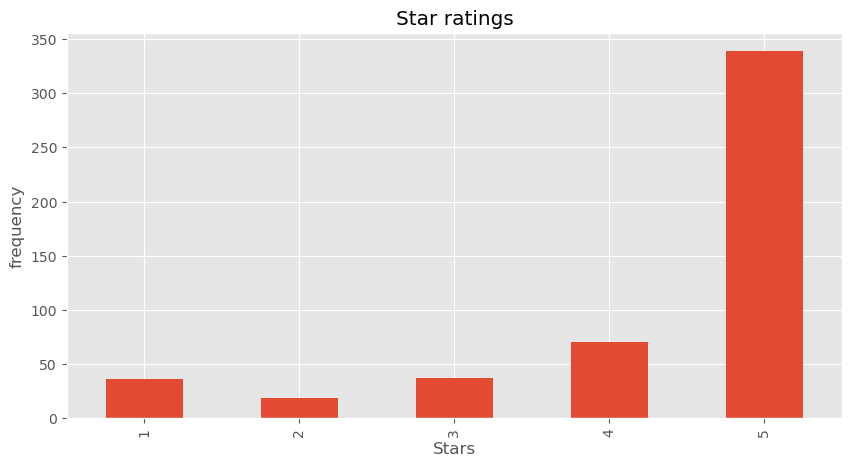

In [88]:
# Data Analysis
'''
Its important to know what are the reviews by the customers based on the stars they have given to various products bought online. This will helps us know 
what is the general sentiment of the public as whole on the products sold by the company. Higher ratings in general speak that the company's product are 
liked by the customers and if the case is other way around then, it simply means that the company needs to improve on its product quality or price per se. 
I am making a plot of stars given by public based on their frequency in the dataset. 
'''
axis = df['Score'].value_counts().sort_index().plot(kind='bar',
          title = 'Star ratings',
          figsize=(10,5))
axis.set_xlabel('Stars')
axis.set_ylabel('frequency')
plt.show()



In [ ]:
# As we can see that more people have given 5 star ratings for the products and that is a good indicator that we can expect more positive sentiments from the public. 
# We can make our assumption concrete by utilizing the pretrained models and by training our dataset. 

In [7]:
# Sentiment analysis through VADER
# VADER (Valence Aware Dictionary for Sentiment Reasoning) is an NLTK module that provides sentiment scores based on the words used. It is a lexicone and rule-based sentiment analysis tool that is specifically 
# attuned to setiments expressed in social media and works on texts from other domains. 
# This uses a "bag of words" approach:
# 1. Stop words are removed like 'and', 'or', 'is' that have no meaning to the sentiment
# 2. Each word is scored and combined to a total score. 

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

analyzer = SentimentIntensityAnalyzer()

In [10]:
# Run the polarity score on entire data set
res = {}  # Dictionary to store the results
for i, row in tqdm(df.iterrows(), total=len(df)):
    text_ = row['Text']
    myid = row['Id']
    res[myid] = analyzer.polarity_scores(text_)

  0%|          | 0/400 [00:00<?, ?it/s]

In [12]:
vadersResult = pd.DataFrame(res).T
vadersResult = vadersResult.reset_index().rename(columns = {'index': 'Id'})
vadersResult = vadersResult.merge(df, how='left')
vadersResult.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


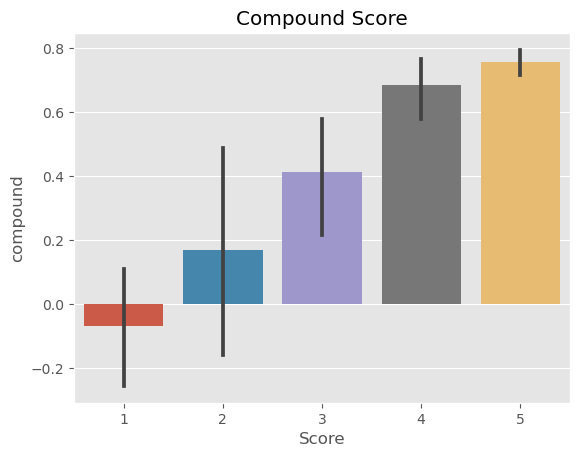

In [13]:
# Plot vaders result
axis = sns.barplot(data = vadersResult, x='Score', y = 'compound')
axis.set_title('Compound Score')
plt.show()

In [ ]:
# The above barplot displays the compound scores. The compound scores displays the result of the vaders model. 
# It shows the compound value of the ratings. The compound value signifies the star ratings given by public. The compound score signifies a value from -1 to +1.  
# It can be any number between this range. Though, it depends on the ratings however, more negative the rating, lower is the compound score. 
# As it is apparent that the compound score is <= 0 for 1 star ratings. 
# Hence, it is signifies that our model is built well. 
# Now, lets see the positive, neutral and negative scores as well to get better understanding of results. 

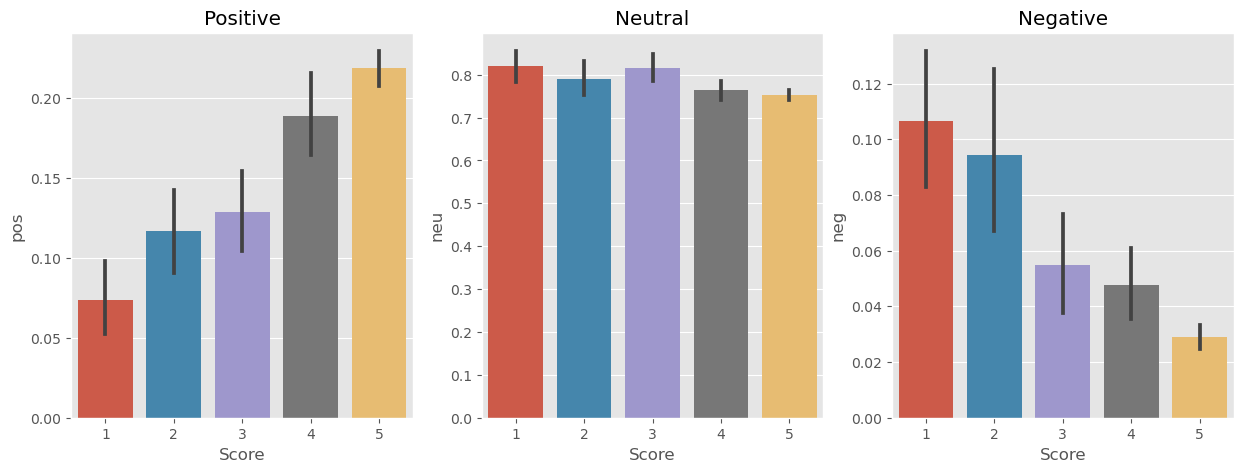

In [77]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vadersResult, x='Score', y = 'pos', ax = axs[0])
sns.barplot(data=vadersResult, x='Score', y = 'neu', ax = axs[1])
sns.barplot(data=vadersResult, x='Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [ ]:
# The above bar plots show the Positive, Neutral and Negative scores given by the model based on the analysis of how 
# much the rating was positive, negative or neutral. The positive text reviews have high scores, whereas, the high negative text reviews have low scores. 
# Thus, our model is able to differentiate between the positive and negative sentiments of the buyers based on the text reviews given to the respective products. 

In [14]:
# Use other methods to improve sentiment analysis. 
# Roberta Pretrained Model
# Our model can be highly improvised using the pretrained Roberta model which is a 
# high level sentiment analysis model by Hugging Face. 

from transformers import AutoTokenizer   # helpful for tokenizing text
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [15]:
# Loading a pretrained model from Hugging face
preModel = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(preModel)
model = AutoModelForSequenceClassification.from_pretrained(preModel)

In [16]:
def roberta_model(text_review):
    encoded_text = tokenizer(text_review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2],
    }
    return scores_dict

In [18]:
# Before running the model on our dataset, I want to remove the data entries that can potentially 
# be too big for the pretrained model. Therefore, I would be doing some data cleaning as well below. 

In [20]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = analyzer.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_model(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
        df.drop(df[df['Id'] == myid].index)
        
        
        
    

  0%|          | 0/400 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [21]:
# Here I have printed those values for which the model could not process the sentiments.
# The 83 and 187th values have been removed from the dataset. 
# Now we will see the results of the sentiments from our vader model and Roberta model. 
# I will distinguish the positive, negative and neutral values for both the models. We will compare how both the models perform. 

In [22]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns = {'index': 'Id'})
result_df = result_df.merge(df, how='left')
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098068,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
# As we can see the Roberta model displays the score of the text values with much more certainity. For Eg. for the first text review which is supposedly positive review. 
# Vader reports the score of 0.305 whereas, Roberta reports the score as 0.9441, which is a much more certain estimate. 
# Now lets print the first text review and see! Is that actually a positive review ?
first_review = df['Text'][0]
print(first_review)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [24]:
# Yes, the review is indeed positive!

In [25]:
# Conclusion 
'''
In conclusion, the application of Natural Language Processing (NLP) models, specifically Vader and Roberta, on Amazon Reviews reveals notable insights. 
The utilization of these pretrained models aimed to discern sentiment and extract meaningful information from the vast array of customer reviews. 
Through rigorous evaluation, it becomes evident that Roberta consistently outperforms Vader in this context.

Roberta's superior performance can be attributed to its advanced architecture and fine-tuning capabilities, 
allowing it to capture nuanced patterns and context within the Amazon Reviews dataset. 
The model's ability to grasp intricate language structures and contextual nuances enables more accurate sentiment analysis and information extraction.
''';

In [26]:
# Data Citation
'''
STANFORD NETWORK ANALYSIS PROJECT. ([2017; 01]). “Amazon Fine Food Reviews”, Version 2. Retrieved 02/25/2024 from https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews.
''';